https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/
    
    https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+TS_101+TS_term1/about

In [22]:
import pandas as pd

df = pd.read_csv('data/ts2.csv', parse_dates=['Datetime'], index_col=1)

In [23]:
df.shape

(18288, 2)

In [24]:
df.head(n=30)

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
2012-08-25 05:00:00,5,2
2012-08-25 06:00:00,6,2
2012-08-25 07:00:00,7,2
2012-08-25 08:00:00,8,6


In [25]:
df.drop('ID', axis=1, inplace=True)

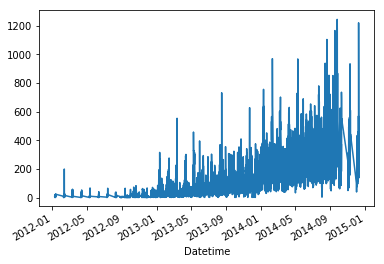

In [26]:
%matplotlib inline

_ = df['Count'].plot()

In [33]:
df = df.loc['2013-01-01':'2014-09-01']
df = df.sort_index()

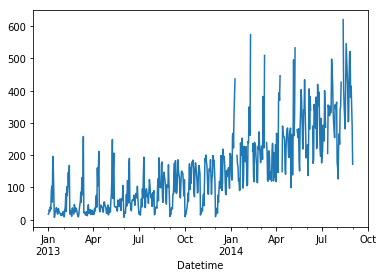

In [34]:
_ = df['Count'].plot()

In [35]:
df = df.resample('1D').mean()

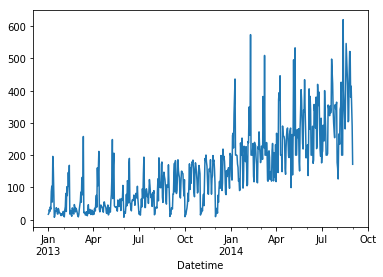

In [40]:
_ = df['Count'].plot()

In [37]:
df.shape

(609, 1)

In [38]:
df[df['Count'].isna()]

,Count
Datetime,
2014-01-10,NaN
2014-01-11,NaN
2014-01-12,NaN
2014-02-10,NaN
2014-02-11,NaN
2014-02-12,NaN
2014-03-10,NaN
2014-03-11,NaN
2014-03-12,NaN


In [39]:
#df.dropna(inplace=True)
df.fillna(200.0, inplace=True)

In [41]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

WINDOW=24

def plot_timeseries_mean_std(the_ts):
    _ = plt.plot(the_ts, color='blue',label='Original')
    _ = plt.plot(the_ts.rolling(window=WINDOW).mean(), color='red', label='Rolling Mean')
    _ = plt.plot(the_ts.rolling(window=WINDOW).std(), color='black', label='Rolling Std')
    _ = plt.legend(loc='best')
    _ = plt.title('Rolling Mean & Standard Deviation')
    
def do_timeseries_test(the_ts):
    res = adfuller(the_ts, autolag='AIC')

    print('ADF Statistic: {:.2f}'.format(res[0]))
    print('P-value:       {:.2f}'.format(res[1]))

    print('Critical Values:')
    for key, value in res[4].items():
        print('     {:>3s}:     {:.2f}'.format(key, value))

In [77]:
import numpy as np

ts = df['Count']
ts_log = np.log(ts)
ts_diff = (ts - ts.shift()).dropna()
ts_diff24 = (ts - ts.shift(24)).dropna()
ts_diff24_diff = (ts_diff24 - ts_diff24.shift()).dropna()
ts_log_diff = (ts_log - ts_log.shift()).dropna()
ts_log_diff24 = (ts_log - ts_log.shift(24)).dropna()

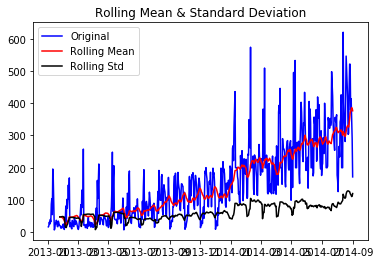

In [43]:
plot_timeseries_mean_std(ts)

In [44]:
do_timeseries_test(ts)

ADF Statistic: -2.62
P-value:       0.09
Critical Values:
      5%:     -2.87
      1%:     -3.44
     10%:     -2.57


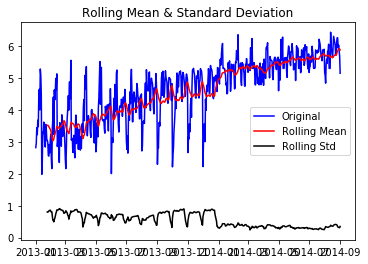

In [45]:
plot_timeseries_mean_std(ts_log)

In [46]:
do_timeseries_test(ts_log)

ADF Statistic: -2.13
P-value:       0.23
Critical Values:
      5%:     -2.87
      1%:     -3.44
     10%:     -2.57


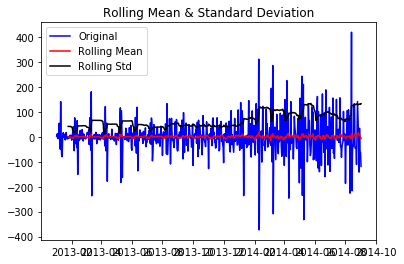

In [47]:
plot_timeseries_mean_std(ts_diff)

In [48]:
do_timeseries_test(ts_diff)

ADF Statistic: -9.33
P-value:       0.00
Critical Values:
      5%:     -2.87
      1%:     -3.44
     10%:     -2.57


In [50]:
#plot_timeseries_mean_std(ts_diff24)

In [51]:
#do_timeseries_test(ts_diff24)

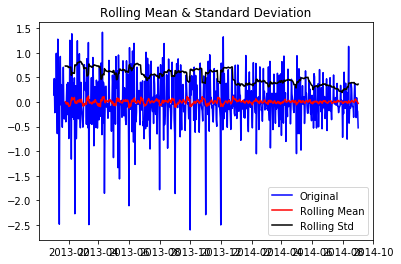

In [52]:
plot_timeseries_mean_std(ts_log_diff)

In [53]:
do_timeseries_test(ts_log_diff)

ADF Statistic: -12.72
P-value:       0.00
Critical Values:
      5%:     -2.87
      1%:     -3.44
     10%:     -2.57


In [54]:
#plot_timeseries_mean_std(ts_log_diff24)

In [55]:
#do_timeseries_test(ts_log_diff24)

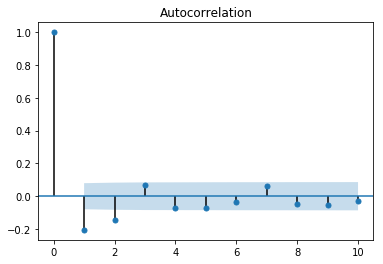

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ax = plot_acf(ts_log_diff, lags=10)

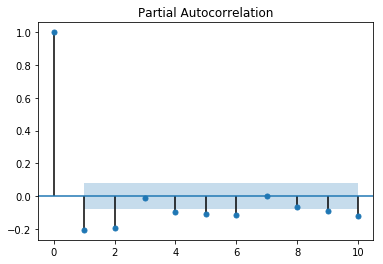

In [57]:
ax = plot_pacf(ts_log_diff, lags=10)

In [58]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log_diff.values, order=(2, 0, 1))  
results = model.fit()

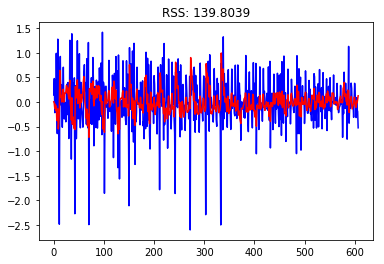

In [59]:
_ = plt.plot(ts_log_diff.values, color='blue')
_ = plt.plot(results.fittedvalues, color='red')

_ = plt.title('RSS: %.4f' % sum(((results.fittedvalues - (ts_log_diff))**2).dropna()))

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [49]:
#df2 = pd.read_csv('data/ts2.csv', parse_dates=['Datetime'], index_col=1)

In [50]:
#df2['Count'].plot()

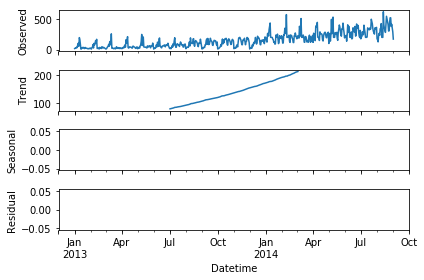

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, freq=365, model='multiplicative')

_ = result.plot()

In [61]:
#result = seasonal_decompose(ts, freq=24*365, model='multiplicative')
#_ = result.plot()

In [66]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = range(0, 3)
d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(1,0,0,7), (1,0,1,7), (0,0,1,7)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (1, 0, 0, 7)
SARIMAX: (0, 0, 1) x (1, 0, 1, 7)
SARIMAX: (0, 1, 0) x (0, 0, 1, 7)


In [67]:
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_param = None
best_param_seasonal = None
best_aic = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_log.values, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            
            if not best_aic or results.aic < best_aic:
                best_param = param
                best_param_seasonal = param_seasonal
                best_aic = results.aic

            print('SARIMA{}x{} - AIC:{:.3f}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            #raise e
            continue
            
print()
print()
print('Best model :')
print()
print('SARIMA{}x{} - AIC:{:.3f}'.format(best_param, best_param_seasonal, best_aic))

SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1568.062
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1118.776
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2969.547
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:1319.260
SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:898.821
SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:2403.567
SARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:947.025
SARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:910.847
SARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:945.508
SARIMA(0, 1, 1)x(1, 0, 0, 7) - AIC:911.196
SARIMA(0, 1, 1)x(1, 0, 1, 7) - AIC:871.865
SARIMA(0, 1, 1)x(0, 0, 1, 7) - AIC:904.139
SARIMA(1, 0, 0)x(1, 0, 0, 7) - AIC:946.943
SARIMA(1, 0, 0)x(1, 0, 1, 7) - AIC:812.984
SARIMA(1, 0, 0)x(0, 0, 1, 7) - AIC:947.520
SARIMA(1, 0, 1)x(1, 0, 0, 7) - AIC:912.427
SARIMA(1, 0, 1)x(1, 0, 1, 7) - AIC:812.743
SARIMA(1, 0, 1)x(0, 0, 1, 7) - AIC:911.699
SARIMA(1, 1, 0)x(1, 0, 0, 7) - AIC:921.800
SARIMA(1, 1, 0)x(1, 0, 1, 7) - AIC:885.282
SARIMA(1, 1, 0)x(0, 0, 1, 7) - AIC:922.134
SARIMA(1, 1, 1)x(1, 0, 0, 7) - AIC:843.784
SARIMA(1, 1, 1)x(1, 0, 1, 7) - AIC:809.552
SARIMA

In [82]:
mod = sm.tsa.statespace.SARIMAX(ts_log.values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

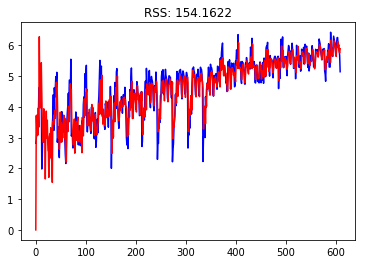

In [83]:
_ = plt.plot(ts_log.values, color='blue')
_ = plt.plot(results.fittedvalues, color='red')

_ = plt.title('RSS: %.4f' % sum(((results.fittedvalues - (ts_log))**2).dropna()))

In [84]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6391      0.027     23.444      0.000       0.586       0.692
ma.L1         -0.9894      0.014    -68.846      0.000      -1.018      -0.961
ar.S.L7        0.9818      0.010    102.142      0.000       0.963       1.001
ma.S.L7       -0.9490      0.026    -36.478      0.000      -1.000      -0.898
sigma2         0.2141      0.008     27.573      0.000       0.199       0.229


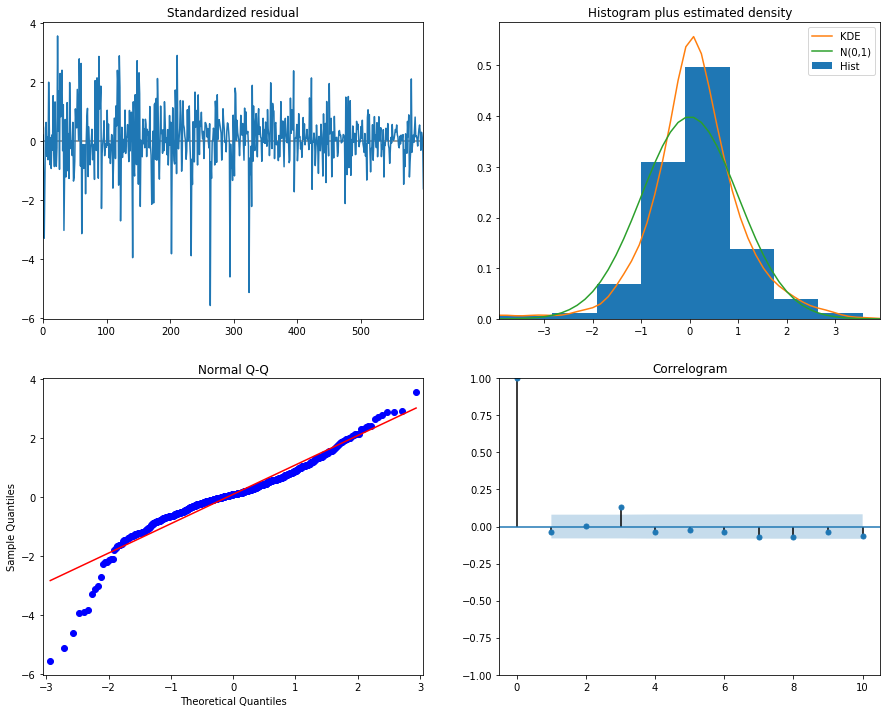

In [85]:
_ = results.plot_diagnostics(figsize=(15, 12))

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

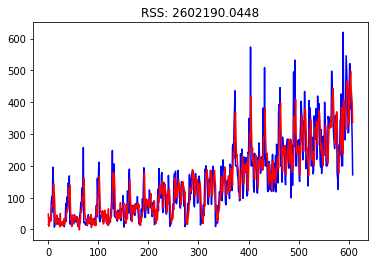

In [88]:
model = ExponentialSmoothing(ts.values, seasonal_periods=24, trend='add', seasonal='add').fit()

_ = plt.plot(ts.values, color='blue')
_ = plt.plot(model._results.fittedvalues, color='red')

_ = plt.title('RSS: %.4f' % sum(((model._results.fittedvalues - ts)**2).dropna()))

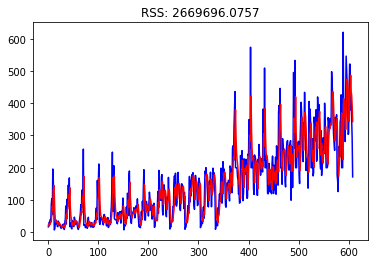

In [89]:
model = Holt(ts.values).fit()

#plt.figsize(16,6)

_ = plt.plot(ts.values, color='blue')
_ = plt.plot(model._results.fittedvalues, color='red')

_ = plt.title('RSS: %.4f' % sum(((model._results.fittedvalues - ts)**2).dropna()))

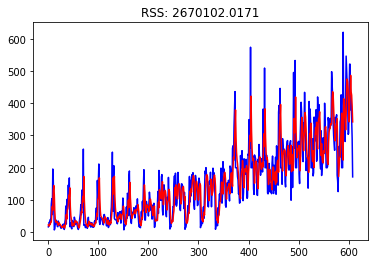

In [90]:
model = SimpleExpSmoothing(ts.values).fit()

_ = plt.plot(ts.values, color='blue')
_ = plt.plot(model._results.fittedvalues, color='red')

_ = plt.title('RSS: %.4f' % sum(((model._results.fittedvalues - ts)**2).dropna()))